In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [4]:
def cross_val_predict(model, k, X, y) -> Tuple[np.array, np.array, np.array]:

    kfold = StratifiedKFold(n_splits=k)
    model_ = cp.deepcopy(model)
    acc_score = []
    pre_score = []
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X,y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        pred_values = model_.predict(test_X)
        acc = accuracy_score(pred_values , test_y)
        pre = precision_score(pred_values , test_y)
        acc_score.append(acc)
        pre_score.append(pre)
        predicted_classes = np.append(predicted_classes, pred_values)
        avg_acc_score = sum(acc_score)/k
        avg_pre_score = sum (pre_score)/k

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('precission of each fold - {}'.format(pre_score))
    print('Avg precission : {}'.format(avg_pre_score))

    return actual_classes, predicted_classes, predicted_proba

In [5]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()
    plt.savefig('confusion-matrix.png')

In [23]:
dataframe = pd.read_csv('X.csv')

X = dataframe.iloc[:, 3:-1].values
y = dataframe.iloc [:, 0]

k=10

In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

accuracy of each fold - [0.6923076923076923, 0.7435897435897436, 0.7230769230769231, 0.717948717948718, 0.6564102564102564, 0.7743589743589744, 0.7743589743589744, 0.764102564102564, 0.6564102564102564, 0.7010309278350515]
Avg accuracy : 0.7203595030399155
precission of each fold - [0.7894736842105263, 0.7744360902255639, 0.7669172932330827, 0.8045112781954887, 0.706766917293233, 0.8571428571428571, 0.849624060150376, 0.8571428571428571, 0.706766917293233, 0.8120300751879699]
Avg precission : 0.7924812030075187


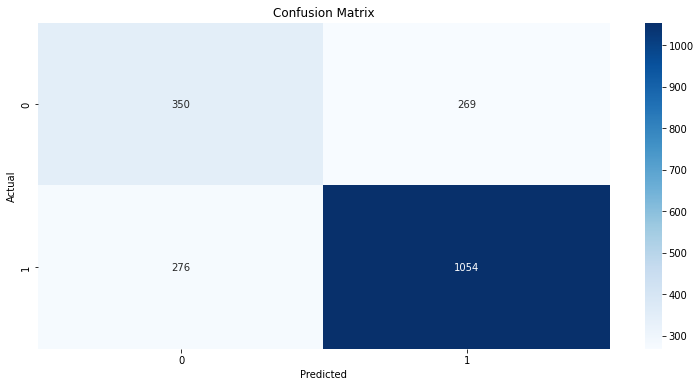

<Figure size 432x288 with 0 Axes>

In [8]:
model =  svm.SVC(kernel='rbf', C=100)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

accuracy of each fold - [0.6564102564102564, 0.7846153846153846, 0.717948717948718, 0.7846153846153846, 0.7128205128205128, 0.7897435897435897, 0.8051282051282052, 0.7589743589743589, 0.7589743589743589, 0.6701030927835051]
Avg accuracy : 0.7439333862014275
precission of each fold - [0.849624060150376, 0.8646616541353384, 0.7969924812030075, 0.8646616541353384, 0.8270676691729323, 0.9097744360902256, 0.924812030075188, 0.8796992481203008, 0.9398496240601504, 0.8571428571428571]
Avg precission : 0.8714285714285716


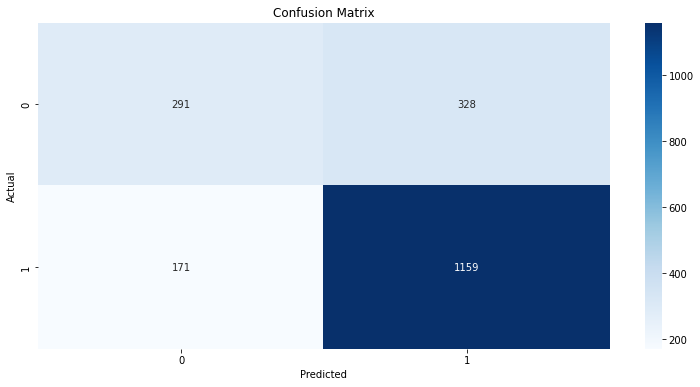

<Figure size 432x288 with 0 Axes>

In [9]:
model = LogisticRegression(random_state=16)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

accuracy of each fold - [0.517948717948718, 0.6410256410256411, 0.5435897435897435, 0.6256410256410256, 0.5282051282051282, 0.5128205128205128, 0.5025641025641026, 0.5692307692307692, 0.5743589743589743, 0.5412371134020618]
Avg accuracy : 0.5556621728786677
precission of each fold - [0.45864661654135336, 0.5338345864661654, 0.39849624060150374, 0.518796992481203, 0.39849624060150374, 0.3684210526315789, 0.3308270676691729, 0.40601503759398494, 0.42105263157894735, 0.48120300751879697]
Avg precission : 0.43157894736842106


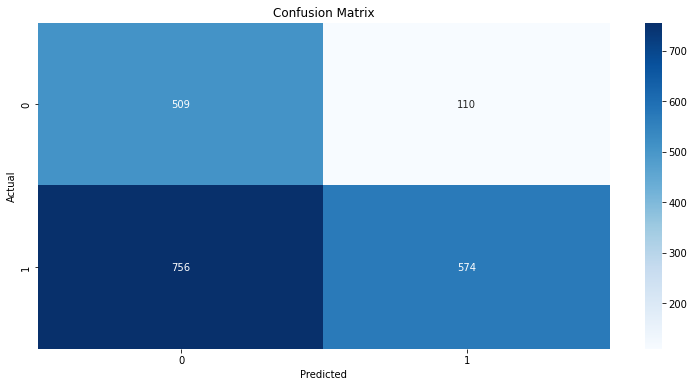

<Figure size 432x288 with 0 Axes>

In [10]:
model = GaussianNB()
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

accuracy of each fold - [0.7076923076923077, 0.7846153846153846, 0.7538461538461538, 0.8051282051282052, 0.7230769230769231, 0.7538461538461538, 0.7948717948717948, 0.8, 0.7282051282051282, 0.6752577319587629]
Avg accuracy : 0.7526539783240814
precission of each fold - [0.9022556390977443, 0.8872180451127819, 0.8195488721804511, 0.924812030075188, 0.8345864661654135, 0.8872180451127819, 0.924812030075188, 0.924812030075188, 0.9022556390977443, 0.8947368421052632]
Avg precission : 0.8902255639097744


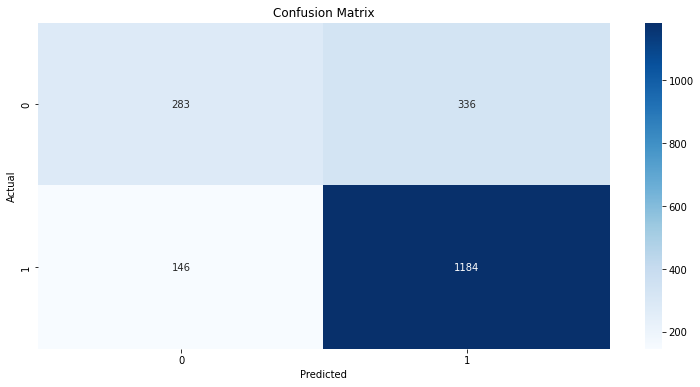

<Figure size 432x288 with 0 Axes>

In [11]:
model = RandomForestClassifier(max_depth=20, random_state=0)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

accuracy of each fold - [0.6564102564102564, 0.7384615384615385, 0.6871794871794872, 0.764102564102564, 0.7128205128205128, 0.7333333333333333, 0.764102564102564, 0.7846153846153846, 0.717948717948718, 0.6752577319587629]
Avg accuracy : 0.7234232090933121
precission of each fold - [0.849624060150376, 0.7894736842105263, 0.7819548872180451, 0.8270676691729323, 0.8345864661654135, 0.849624060150376, 0.8796992481203008, 0.8646616541353384, 0.8345864661654135, 0.8646616541353384]
Avg precission : 0.8375939849624061


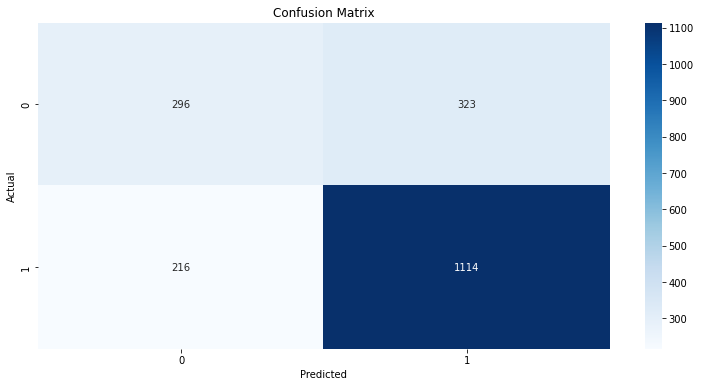

<Figure size 432x288 with 0 Axes>

In [12]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

accuracy of each fold - [0.6820512820512821, 0.8307692307692308, 0.7794871794871795, 0.8512820512820513, 0.7846153846153846, 0.8102564102564103, 0.841025641025641, 0.8, 0.764102564102564, 0.7010309278350515]
Avg accuracy : 0.7844620671424795
precission of each fold - [0.849624060150376, 0.8796992481203008, 0.8270676691729323, 0.9172932330827067, 0.8721804511278195, 0.8947368421052632, 0.9097744360902256, 0.9022556390977443, 0.9022556390977443, 0.8646616541353384]
Avg precission : 0.8819548872180449


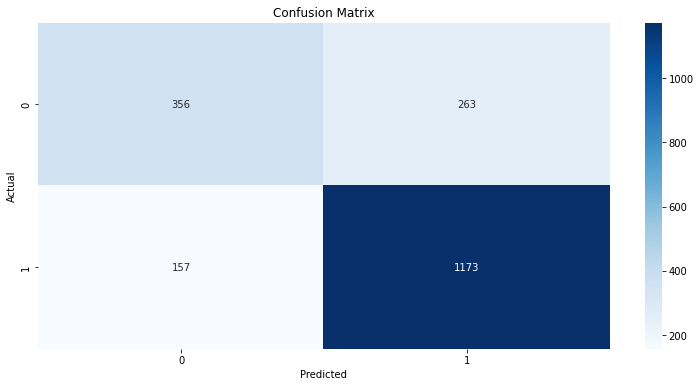

<Figure size 432x288 with 0 Axes>

In [15]:
model = MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), solver='adam', max_iter=2000,warm_start=True)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X_scaled, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [14]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ],
             'max_iter': [2000]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_scaled,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and th

C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to c

C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\yolan\anaconda3\envs\directml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (5,), 'max_iter': 2000, 'solver': 'adam'}


In [25]:
y.values.tolist().count(1)


1101